In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from publish import *

# GREENS DATA TRAJECTORIES

In [2]:
obesity_data = pd.read_csv("Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")

# Selecting only relevant columns
obesity_data = obesity_data[["YearStart", "LocationAbbr", "Question", "Data_Value", "Low_Confidence_Limit", "High_Confidence_Limit", "Sample_Size", "QuestionID", "StratificationID1"]]

obesity_data

/var/folders/2m/q4hnt9rs52xf6dg1gdmh3vym0000gn/T/ipykernel_81604/3795172205.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv("Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


,YearStart,LocationAbbr,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,StratificationID1
0,2019,AK,Percent of students in grades 9-12 who achieve...,9.6,5.5,16.5,130.0,Q048,RACEASN
1,2019,AZ,Percent of students in grades 9-12 who have ob...,13.3,10.7,16.5,1739.0,Q038,OVERALL
2,2019,DC,Percent of students in grades 9-12 who have ob...,17.1,16.2,17.9,8978.0,Q038,OVERALL
3,2019,IL,Percent of students in grades 9-12 who partici...,65.9,49.8,79.1,876.0,Q049,GRADE10
4,2019,MD,Percent of students in grades 9-12 who have an...,16.7,14.5,19.2,2573.0,Q039,RACE2PLUS
...,...,...,...,...,...,...,...,...,...
133340,2022,WY,Percent of adults aged 18 years and older who ...,24.5,16.3,35.3,111.0,Q037,INCLESS15
133341,2022,WY,Percent of adults who engage in no leisure-tim...,36.0,27.9,45.0,159.0,Q047,EDUHS
133342,2022,WY,Percent of adults aged 18 years and older who ...,35.2,30.6,40.0,450.0,Q036,AGEYR3544
133343,2022,WY,Percent of adults aged 18 years and older who ...,35.3,30.2,40.7,512.0,Q037,INC3550


In [3]:
ID_to_question_map = {}

for _, row in obesity_data[["Question", "QuestionID"]].iterrows():
    if row["QuestionID"] not in ID_to_question_map:
        ID_to_question_map[row["QuestionID"]] = row["Question"]
    elif row["Question"] != ID_to_question_map[row["QuestionID"]]:
        print("INCONSISTENT MAP")
obesity_data = obesity_data.drop(["Question"], axis=1)

ID_to_question_map

{'Q048': 'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
 'Q038': 'Percent of students in grades 9-12 who have obesity',
 'Q049': 'Percent of students in grades 9-12 who participate in daily physical education',
 'Q039': 'Percent of students in grades 9-12 who have an overweight classification',
 'Q058': 'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day',
 'Q021': 'Percent of students in grades 9-12 who consume vegetables less than 1 time daily',
 'Q020': 'Percent of students in grades 9-12 who consume fruit less than 1 time daily',
 'Q059': 'Percent of students in grades 9-12 watching 3 or more hours of television each school day',
 'Q047': 'Percent of adults who engage in no leisure-time physical activity',
 'Q036': 'Percent of adults aged 18 years and older who have obesity',
 'Q037': 'Percent of adults aged 18 years and older who have an overweight classification',


#### We are interested in Question IDs: 18, 19, 20, 21

In [4]:
# Selecting rows with relevant question IDs
obesity_data = obesity_data[((obesity_data["QuestionID"].apply(lambda x: int(x[2:]))) <= 21) & ((obesity_data["QuestionID"].apply(lambda x: int(x[2:]))) >= 18)]

obesity_data

,YearStart,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,StratificationID1
20,2019,IA,43.1,38.4,47.9,1529.0,Q021,OVERALL
21,2019,KS,43.1,37.0,49.5,258.0,Q020,GRADE11
23,2019,OK,58.9,53.9,63.8,931.0,Q020,RACEWHT
24,2019,VT,29.4,28.1,30.6,5102.0,Q021,GRADE09
25,2019,WV,47.3,42.3,52.3,438.0,Q021,GRADE10
...,...,...,...,...,...,...,...,...
128858,2021,OH,18.6,15.8,21.8,1483.0,Q019,INC3550
128859,2021,WY,28.2,21.0,36.6,295.0,Q019,INC1525
128860,2021,HI,56.5,51.0,61.9,467.0,Q018,AGEYR1824
128863,2021,ND,27.2,25.1,29.5,2690.0,Q019,MALE


In [8]:
questions = obesity_data["QuestionID"].unique()
states = obesity_data["LocationAbbr"].unique()
strata = obesity_data["StratificationID1"].unique()

questions, states, strata

(array(['Q021', 'Q020', 'Q018', 'Q019'], dtype=object),
 array(['IA', 'KS', 'OK', 'VT', 'WV', 'US', 'UT', 'FL', 'VA', 'WY', 'TN',
        'GA', 'MI', 'NV', 'SC', 'NC', 'ID', 'CT', 'MT', 'AL', 'CO', 'CA',
        'IN', 'HI', 'DE', 'PA', 'ME', 'NH', 'AK', 'TX', 'KY', 'LA', 'NJ',
        'ND', 'AR', 'GU', 'MA', 'NM', 'AZ', 'MS', 'IL', 'DC', 'SD', 'MD',
        'MO', 'WI', 'NE', 'RI', 'PR', 'NY', 'OH', 'VI', 'WA', 'MN', 'OR'],
       dtype=object),
 array(['OVERALL', 'GRADE11', 'RACEWHT', 'GRADE09', 'GRADE10', 'FEMALE',
        'MALE', 'RACEHIS', 'RACE2PLUS', 'GRADE12', 'RACEASN', 'RACEHPI',
        'RACEBLK', 'RACENAA', 'INCLESS15', 'INC2535', 'AGEYR4554', 'EDUHS',
        'EDUHSGRAD', 'AGEYR1824', 'INC1525', 'INC3550', 'RACEOTH',
        'AGEYR3544', 'INC75PLUS', 'EDUCOGRAD', 'EDUCOTEC', 'AGEYR2534',
        'AGEYR65PLUS', 'INC5075', 'AGEYR5564', 'INCNR', nan], dtype=object),
 array([2019, 2013, 2011, 2001, 2017, 2009, 2007, 2003, 2015, 2005, 2021]))

#### For now, I will ignore stratification and states, and only aggregate data

In [39]:
question_dfs = {}

# Defining a custom function for data aggregation
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

for question in questions:
    temp_df = obesity_data[(obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == "OVERALL")].drop(["StratificationID1", "QuestionID"], axis=1)
    temp_df = temp_df.dropna(subset=["Sample_Size", "Data_Value"])

    weighted_mean_function = lambda x: weighted_average(x, temp_df.loc[x.index, "Sample_Size"])
    temp_df = temp_df.groupby("YearStart").agg(Low_Confidence_Limit=("Low_Confidence_Limit", weighted_mean_function), High_Confidence_Limit=("High_Confidence_Limit", weighted_mean_function), Data_Value=("Data_Value", weighted_mean_function))
    
    question_dfs[question] = temp_df

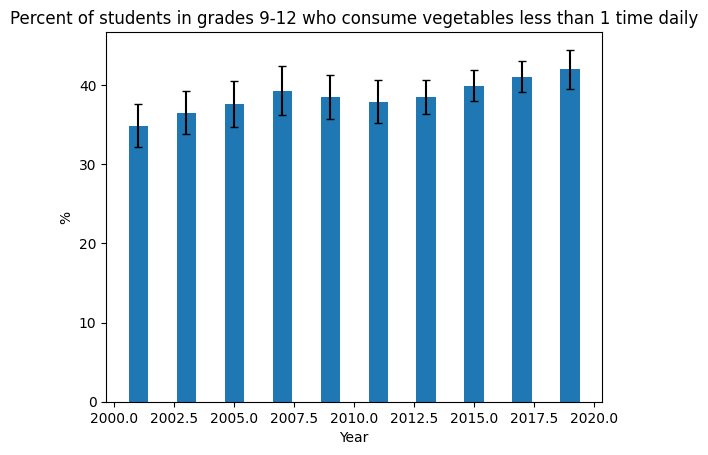

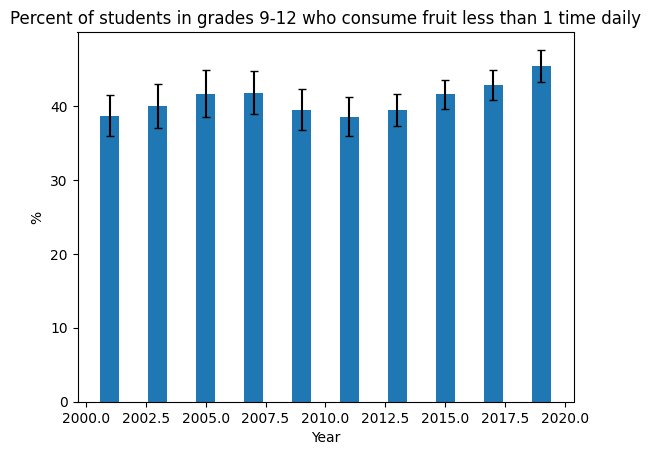

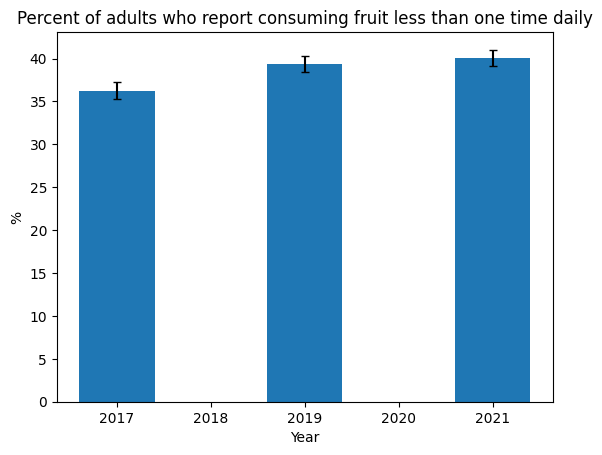

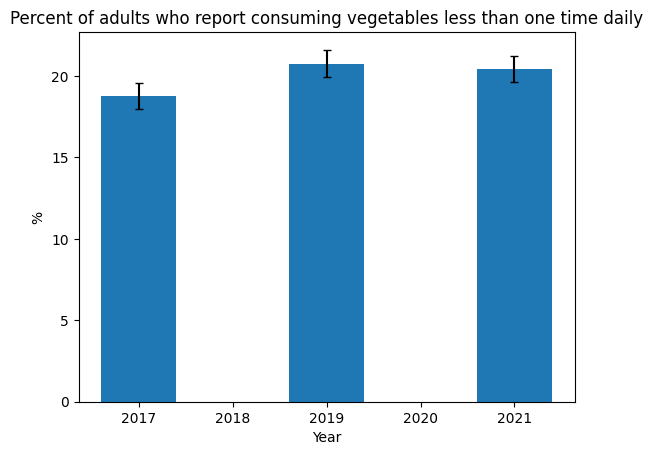

In [40]:
for question in question_dfs:
    xs = question_dfs[question].index
    ys = question_dfs[question]["Data_Value"]

    upper_error = question_dfs[question]["High_Confidence_Limit"] - question_dfs[question]["Data_Value"]
    lower_error = question_dfs[question]["Data_Value"] - question_dfs[question]["Low_Confidence_Limit"]

    plt.gcf()
    plt.bar(xs, ys, yerr=[lower_error, upper_error], capsize=3)
    plt.xlabel("Year")
    plt.ylabel("%")
    plt.title(ID_to_question_map[question])
    plt.show()